### Unsupervised Learning

**OBJECTIVES**

- Understand unsupervised learning and its difference from supervised learning
- Use KMeans and DBSCAN clustering algorithms to cluster data
- Use Hidden Markov Models to Cluster sequential data

# Clustering



In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.datasets import make_blobs

In [3]:
X, _ = make_blobs(random_state=11)

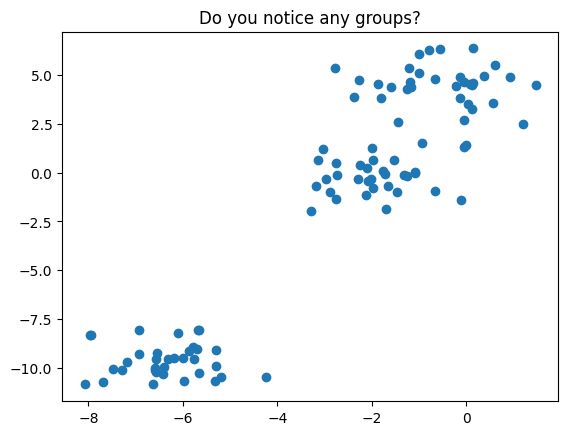

In [4]:
plt.scatter(X[:, 0], X[:, 1])
plt.title('Do you notice any groups?');

There are many clustering algorithms in sklearn -- let us use the KMeans and DBSCAN approach to cluster this data.

- [KMeans](https://www.naftaliharris.com/blog/visualizing-k-means-clustering/)
- [DBSCAN](https://www.naftaliharris.com/blog/visualizing-dbscan-clustering/)

In [5]:
from sklearn.cluster import KMeans, DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

Setup a pipeline to fit the KMeans clustering model, fit it to the data and plot the resulting clusters.

- [KMeans docs](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html#sklearn.cluster.KMeans)

#### Evaluating Clusters

**Inertia**

Sum of squared differences between each point in a cluster and that cluster's centroid.

How dense is each cluster?

low inertia = dense cluster
ranges from 0 to very high values
$$ \sum_{j=0}^{n} (x_j - \mu_i)^2 $$
where $\mu_i$ is a cluster centroid

`.inertia_` is an attribute of a fitted sklearn's kmeans object

**Silhouette Score**

Tells you how much closer data points are to their own clusters than to the nearest neighbor cluster.

How far apart are the clusters?

ranges from -1 to 1
high silhouette score means the clusters are well separated
$$s_i = \frac{b_i - a_i}{max\{a_i, b_i\}}$$
Where:

$a_i$ = Cohesion: Mean distance of points within a cluster from each other.

$b_i$ = Separation: Mean distance from point $x_i$ to all points in the next nearest cluster.
Use scikit-learn: `metrics.silhouette_score(X_scaled, labels)`.

Higher silhouette score is better!¶

**PROBLEM: Customer Segmentation**

Using the article [here](https://www.semanticscholar.org/paper/Data-mining-for-the-online-retail-industry%3A-A-case-Chen-Sain/e43a5a90fa33d419df42e485099f8f08badf2149) and associated dataset loaded below, your goal is to apply unsupervised learning to a problem in the retail industry.  Complete the form [here](https://forms.gle/QNxwRQUxhQbhjJuH9) as you work through the problem.

In [ ]:
pip install ucimlrepo

In [ ]:
from ucimlrepo import fetch_ucirepo 

In [22]:
# online_retail = fetch_ucirepo(id=352) 
# X = online_retail.data.features
# X.head()

### Hidden Markov Models











<center>
 <img src = https://upload.wikimedia.org/wikipedia/commons/thumb/8/8a/HiddenMarkovModel.svg/600px-HiddenMarkovModel.svg.png />
</center>

In [6]:
from IPython.display import Audio
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
import warnings
warnings.filterwarnings('ignore')

In [7]:
import yfinance as yf

In [8]:
btcn = yf.Ticker('BTC-USD')

In [9]:
btcn = btcn.history()

$BTC-USD: possibly delisted; no price data found  (period=1mo)


In [10]:
btcn.head()

Empty DataFrame
Columns: [Open, High, Low, Close, Adj Close, Volume]
Index: []

<Axes: xlabel='Date'>

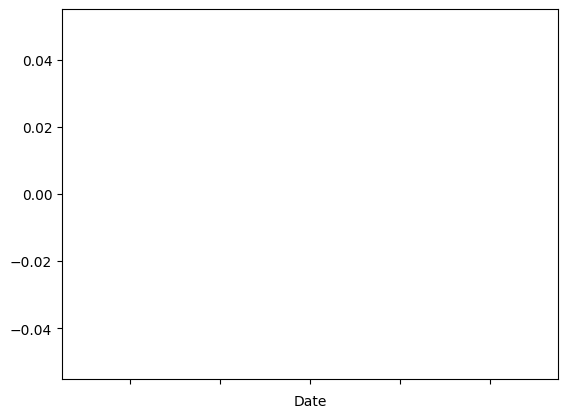

In [11]:
#plot it
btcn['Close'].plot()

### HMMLearn

We will use the `hmmlearn` library to implement our hidden markov model.  Here, we use the `GaussianHMM` class.  Depending on the nature of your data you may be interested in a different probability distribution.

- **HMM Learn**: [here](https://hmmlearn.readthedocs.io/en/latest/tutorial.html)

In [12]:
#!pip install hmmlearn

In [20]:
from hmmlearn import hmm

In [21]:
#instantiate 
model = hmm.GaussianHMM(n_components=3)

In [15]:
#fit
X = btcn['2021':][['Close']]

In [16]:
X.head()

Empty DataFrame
Columns: [Close]
Index: []

In [17]:
model.fit(X)

ValueError: Found array with 0 sample(s) (shape=(0, 1)) while a minimum of 1 is required.

In [18]:
#predict
model.predict(X)

NotFittedError: This GaussianHMM instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

In [19]:
#look at our predictions
plt.plot(model.predict(X))

NotFittedError: This GaussianHMM instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

### Extra: Looking at Speech Files

For a deeper dive into HMM's for speech recognition please see Rabner's article A tutorial on hidden Markov models and selected applications in speech recognition [here](https://web.ece.ucsb.edu/Faculty/Rabiner/ece259/Reprints/tutorial%20on%20hmm%20and%20applications.pdf).

In [127]:
from scipy.io import wavfile

In [96]:
!ls sounds/apple

apple01.wav apple04.wav apple07.wav apple10.wav apple13.wav
apple02.wav apple05.wav apple08.wav apple11.wav apple14.wav
apple03.wav apple06.wav apple09.wav apple12.wav apple15.wav


In [129]:
#read in the data and structure
rate, apple = wavfile.read('sounds/apple/apple01.wav')

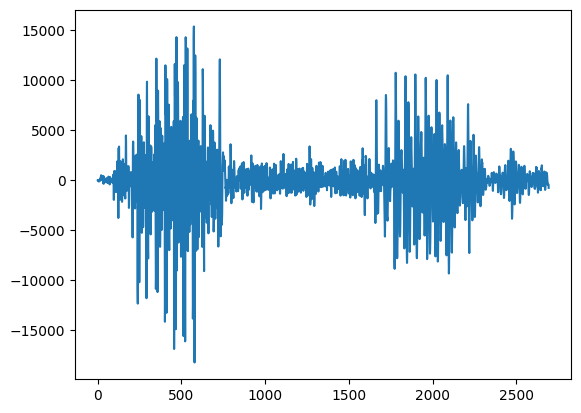

In [130]:
#plot the sound
plt.plot(apple)

In [131]:
#look at another sample
rate, kiwi = wavfile.read('sounds/kiwi/kiwi01.wav')

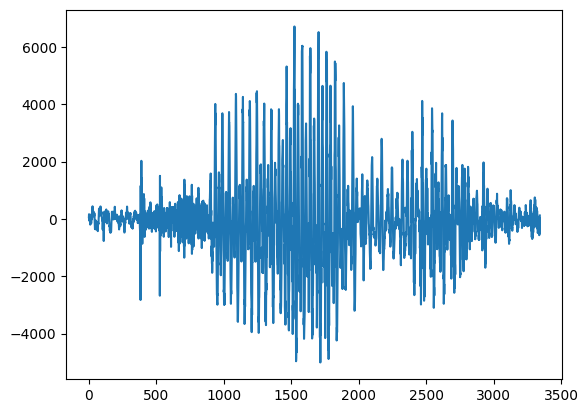

In [132]:
#kiwi's perhaps
plt.plot(kiwi)

In [133]:
from IPython.display import Audio

In [134]:
#take a listen to an apple
Audio('sounds/banana/banana02.wav')

### Generating Features from Audio: Mel Frequency Cepstral Coefficient

Big idea here is to extract the important elements that allow us to identify speech.  For more info on the MFCC, see [here](http://practicalcryptography.com/miscellaneous/machine-learning/guide-mel-frequency-cepstral-coefficients-mfccs/).

In [135]:
!pip install python_speech_features

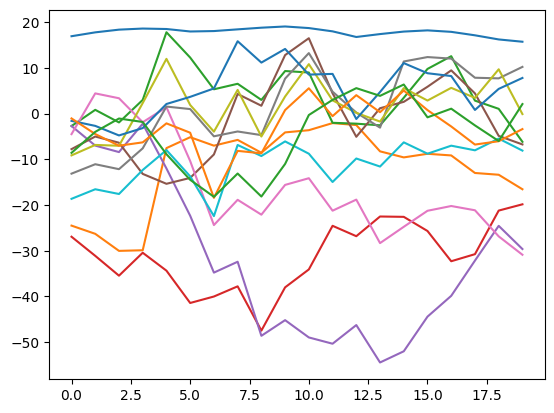

In [136]:
import python_speech_features as features

#extract the mfcc features
mfcc_features = features.mfcc(kiwi)

#plot them
plt.plot(mfcc_features);

#determine our x and y
X = features.mfcc(kiwi)
y = ['kiwi']

In [137]:
import os

In [138]:
#make a custom markov class to return scores
class MakeMarkov:
    
    def __init__(self, n_components = 3):
        self.components = n_components
        self.model = hmm.GaussianHMM(n_components=self.components)
        
    def fit(self, X):
        self.fit_model = self.model.fit(X)
        return self.fit_model
    
    def score(self, X):
        self.score = self.fit_model.score(X)
        return self.score
        
    

In [139]:
kiwi_model = MakeMarkov()
kiwi_model.fit(X)
kiwi_model.score(X)

-716.5960110710494

In [148]:
hmm_models = []
labels = []
for file in os.listdir('sounds'):
    sounds = os.listdir(f'sounds/{file}')
    sound_files = [f'sounds/{file}/{sound}' for sound in sounds]
    for sound in sound_files[:-1]:
        rate, data = wavfile.read(sound)
        X = features.mfcc(data)
        mmodel = MakeMarkov()
        mmodel.fit(X)
        hmm_models.append(mmodel)
        labels.append(file)



Model is not converging.  Current: -716.5960110683251 is not greater than -716.5960103649421. Delta is -7.033829660940683e-07
Model is not converging.  Current: -747.3672269421435 is not greater than -747.3672266158559. Delta is -3.262875907239504e-07
Model is not converging.  Current: -893.797647183185 is not greater than -893.7976469118219. Delta is -2.7136309199704556e-07
Model is not converging.  Current: -783.244336836378 is not greater than -783.244336643972. Delta is -1.9240599158365512e-07


In [149]:
hmm_models[:3]

In [150]:
#write a loop that bops over the files and prints the label based on
#highest score



### Making Predictions

Now that we have our models, given a new sound we want to score these based on what we've learned and select the most likely example.

In [151]:
in_files = ['sounds/pineapple/pineapple15.wav',
           'sounds/orange/orange15.wav',
           'sounds/apple/apple15.wav',
           'sounds/kiwi/kiwi15.wav']

In [152]:
scores = []
for model in hmm_models:
    rate, data = wavfile.read(in_files[0])
    X = features.mfcc(data)
    # print(model.score(X))
    scores.append(model.score(X))

In [153]:
scores[:10]

[-2558.6428349055427,
 -2323.421581745123,
 -3096.5354762446377,
 -2012.4235454294576,
 -2583.204668338286,
 -2524.256633898634,
 -2034.4415383269575,
 -1876.7069048956384,
 -2647.9744115635535,
 -2025.0155441234654]

In [154]:
scores.index(max(scores))

61

In [155]:
labels[61]

'pineapple'

In [120]:
len(labels)

98

### Further Reading

- **Textbook**: Marsland's *Machine Learning: An Algorithmic Perspective* has a great overview of HMM's.
- **Time Series Examples**: Checkout Aileen Nielsen's tutorial from [SciPy 2019](https://www.youtube.com/watch?v=v5ijNXvlC5A) and her book *Practical Time Series Analysis*
- **Speech Recognition**: Rabiner's [*A tutorial on hidden Markov models and selected applications in speech recognition*]('readings/rabiner.pdf')
- **HMM's and Dynamic Programming**: Avik Das' PyData Talk [*Dynamic Programming for Machine Learning: Hidden Markov Models*](https://www.youtube.com/watch?v=MADX-L75ub8)